# Acc 2 Stock Performance Tracker


## Setup


In [1]:
import contextlib
import pandas as pd
import draw_utils, process_utils, const


In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [3]:
acc_name = const.ACC2_NAME
user_name_l = const.ACC_USER_DICT[acc_name]
compare_index = const.VNI_NAME


## Prepare Dataframe


In [4]:
log_df, cf_df = process_utils.prepare_log_df_cf_df(
    acc_user_dict={
        acc_name_key: user_name_l
        for acc_name_key, user_name_l in const.ACC_USER_DICT.items()
        if acc_name_key == acc_name
    },
    acc_combined_name=None,
    index_name_l=[compare_index],
    index_combined_name=None,
)


In [5]:
user_df = process_utils.get_user_df(
    log_df,
    cf_df,
    acc_name=acc_name,
    user_name_l=user_name_l,
    index_name=compare_index,
)


## Charts


### NAV


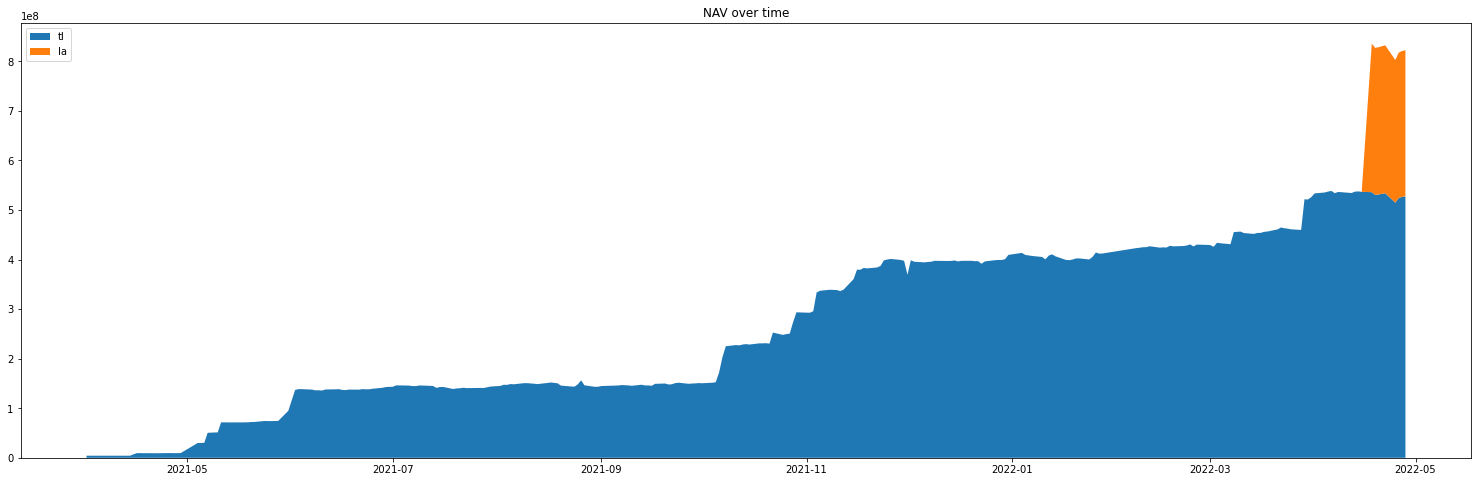

In [6]:
y_list = [user_df[user_name] for user_name in user_name_l]

draw_utils.plot_nav_stackplot(
    x=user_df.index,  # type: ignore
    y=y_list,
    labels=user_name_l,
)


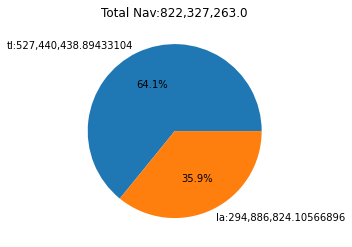

In [7]:
nav_l = [user_df[user_name].iloc[-1] for user_name in user_name_l]  # type: ignore
label_l = [f"{user_name}:{nav:,}" for user_name, nav in zip(user_name_l, nav_l)]
draw_utils.plot_nav_pie(nav_l, label_l=label_l)


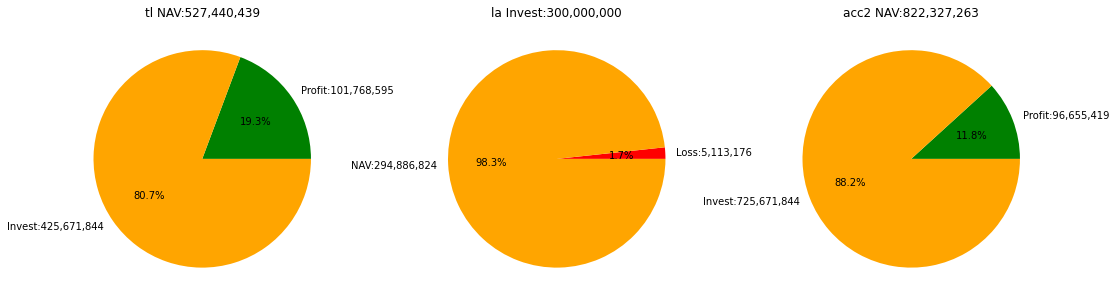

In [8]:
profit_invest_list: list[tuple[str, float, float]] = []
for name in user_name_l + [acc_name]:
    nav = user_df[name].iloc[-1]
    invest = -user_df[f"{name}_cf"].sum()
    profit = nav - invest
    profit_invest_list.append((name, profit, invest))
draw_utils.plot_profit_invest_pies(profit_invest_list)


### Recent


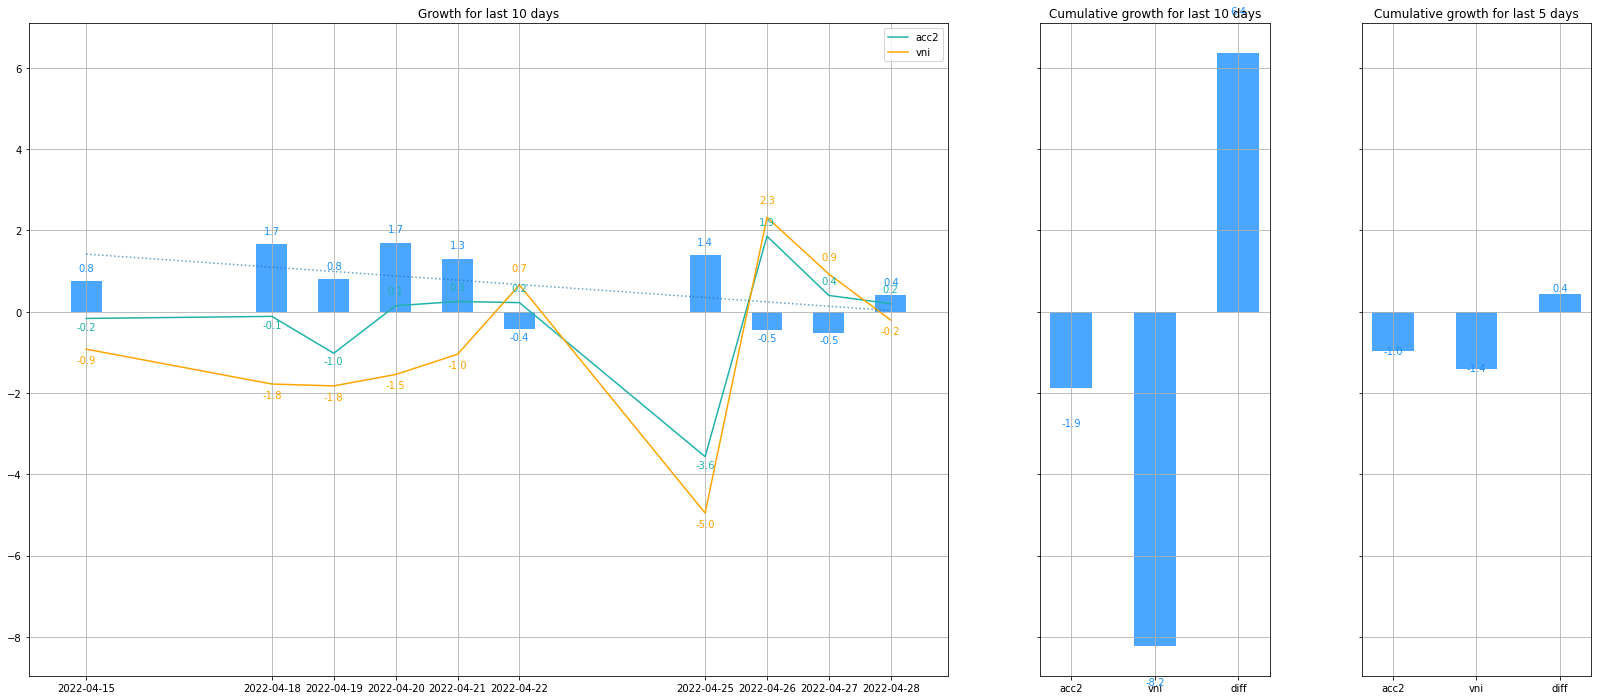

In [9]:
draw_utils.plot_recent_growth(
    user_df,
    num_days=10,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


In [10]:
user_df.tail(10)


,vni,vni_diff,acc2,acc2_diff,tl_cf,la_cf,acc2_cf,day_start,tl_day_start,tl_share,tl_diff,tl,la_day_start,la_share,la_diff,la,acc2_diff_p,acc2_aux_diff_p,tl_diff_p,tl_aux_diff_p,la_diff_p,la_aux_diff_p,vni_diff_p,vni_aux_diff_p
date,,,,,,,,,,,,,,,,,,,,,,,,
2022-04-15,1458.56,-13.56,536585967,-891200.0,0.0,0.0,0.0,537477167.0,5.374772e+08,1.0000,-8.912000e+05,5.365860e+08,0.000000e+00,0.0000,-0.000000e+00,0.000000e+00,-0.001658,0.998342,-0.001658,0.998342,NaN,NaN,-0.009211,0.990789
2022-04-18,1432.60,-25.96,835621795,-964172.0,0.0,-300000000.0,-300000000.0,836585967.0,5.365860e+08,0.6414,-6.184196e+05,5.359675e+08,3.000000e+08,0.3586,-3.457524e+05,2.996542e+08,-0.001153,0.998847,-0.001153,0.998847,-0.001153,0.998847,-0.017798,0.982202
2022-04-19,1406.45,-26.15,827075354,-8546441.0,0.0,0.0,0.0,835621795.0,5.359675e+08,0.6414,-5.481684e+06,5.304859e+08,2.996542e+08,0.3586,-3.064757e+06,2.965895e+08,-0.010228,0.989772,-0.010228,0.989772,-0.010228,0.989772,-0.018254,0.981746
2022-04-20,1384.72,-21.73,828288112,1212758.0,0.0,0.0,0.0,827075354.0,5.304859e+08,0.6414,7.778626e+05,5.312637e+08,2.965895e+08,0.3586,4.348954e+05,2.970244e+08,0.001466,1.001466,0.001466,1.001466,0.001466,1.001466,-0.015450,0.984550
2022-04-21,1370.21,-14.51,830367127,2079015.0,0.0,0.0,0.0,828288112.0,5.312637e+08,0.6414,1.333480e+06,5.325972e+08,2.970244e+08,0.3586,7.455355e+05,2.977699e+08,0.002510,1.002510,0.002510,1.002510,0.002510,1.002510,-0.010479,0.989521
2022-04-22,1379.23,9.02,832218455,1851328.0,0.0,0.0,0.0,830367127.0,5.325972e+08,0.6414,1.187441e+06,5.337846e+08,2.977699e+08,0.3586,6.638868e+05,2.984338e+08,0.002230,1.002230,0.002230,1.002230,0.002230,1.002230,0.006583,1.006583
2022-04-25,1310.92,-68.31,802544279,-29674176.0,0.0,0.0,0.0,832218455.0,5.337846e+08,0.6414,-1.903301e+07,5.147516e+08,2.984338e+08,0.3586,-1.064117e+07,2.877926e+08,-0.035657,0.964343,-0.035657,0.964343,-0.035657,0.964343,-0.049528,0.950472
2022-04-26,1341.34,30.42,817462962,14918683.0,0.0,0.0,0.0,802544279.0,5.147516e+08,0.6414,9.568838e+06,5.243205e+08,2.877926e+08,0.3586,5.349845e+06,2.931425e+08,0.018589,1.018589,0.018589,1.018589,0.018589,1.018589,0.023205,1.023205
2022-04-27,1353.77,12.43,820721240,3258278.0,0.0,0.0,0.0,817462962.0,5.243205e+08,0.6414,2.089858e+06,5.264103e+08,2.931425e+08,0.3586,1.168420e+06,2.943109e+08,0.003986,1.003986,0.003986,1.003986,0.003986,1.003986,0.009267,1.009267


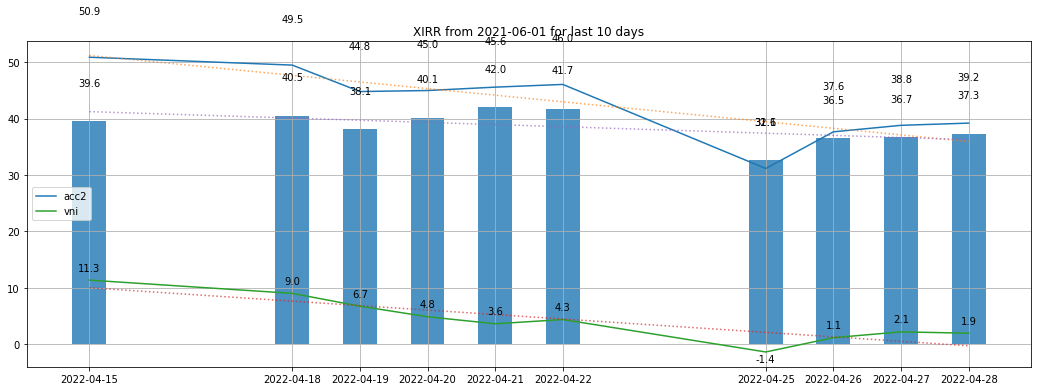

In [11]:
draw_utils.plot_recent_xirr(
    log_df=user_df,
    cf_df=cf_df,
    num_days=10,
    anchor_date="2021-06-01",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


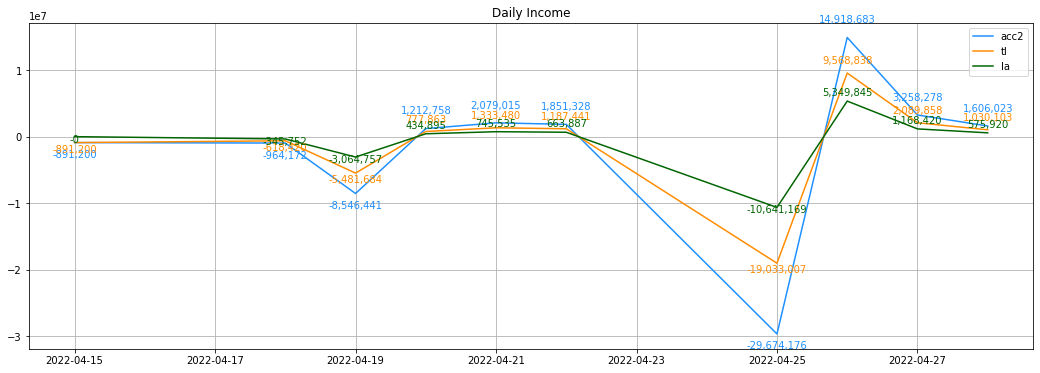

In [12]:
draw_utils.plot_recent_income(
    daily_df=user_df,
    num_days=10,
    name_l=[acc_name] + user_name_l,
)


### Diff distribution


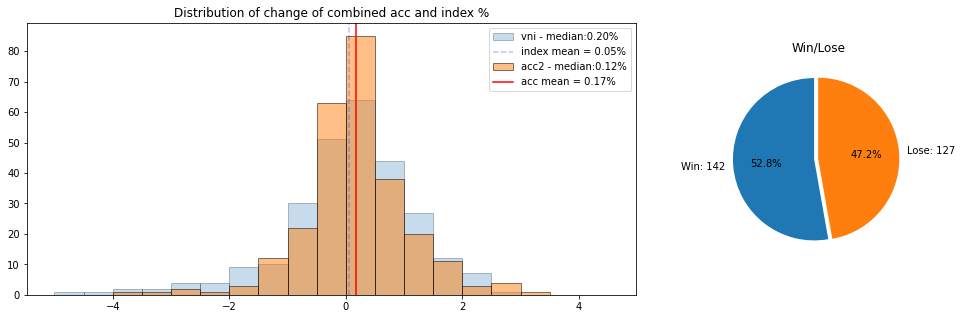

In [13]:
draw_utils.plot_daily_diff_p_distribution(
    user_df,
    acc_name=acc_name,
    index_name=compare_index,
)


### Growth XIRR


In [14]:
anchor_date = "2022-1-1"

growth_xirr_df = process_utils.get_overall_growth_xirr_df(
    user_df,
    cf_df,
    anchor_date=anchor_date,
    acc_name_l=[acc_name],
    index_name_l=[compare_index],
)


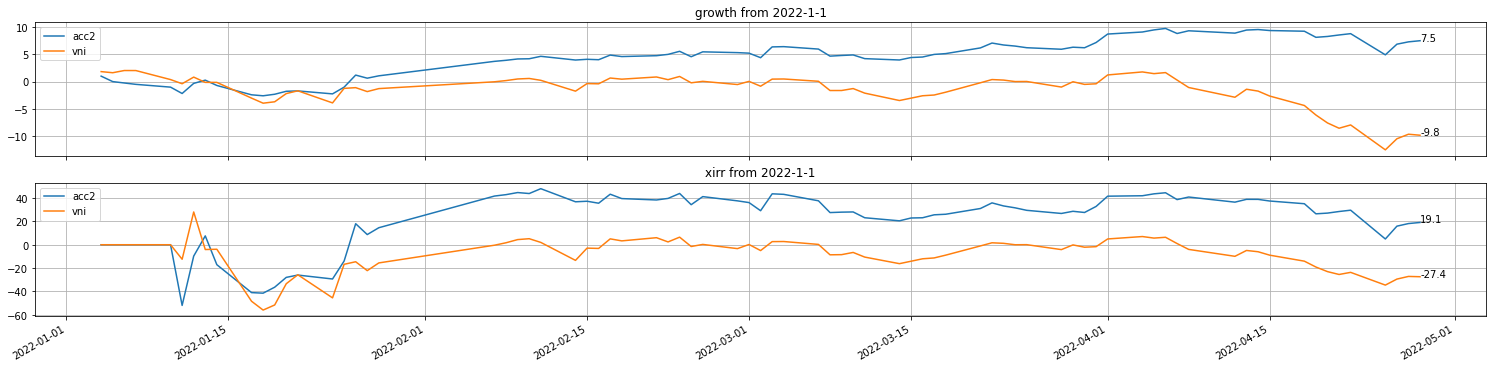

In [15]:
draw_utils.plot_growth_xirr_over_time(
    growth_xirr_df,
    anchor_date=anchor_date,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


### Periodic


In [16]:
periodic_user_df = process_utils.add_period_cols(user_df)


#### Weekly


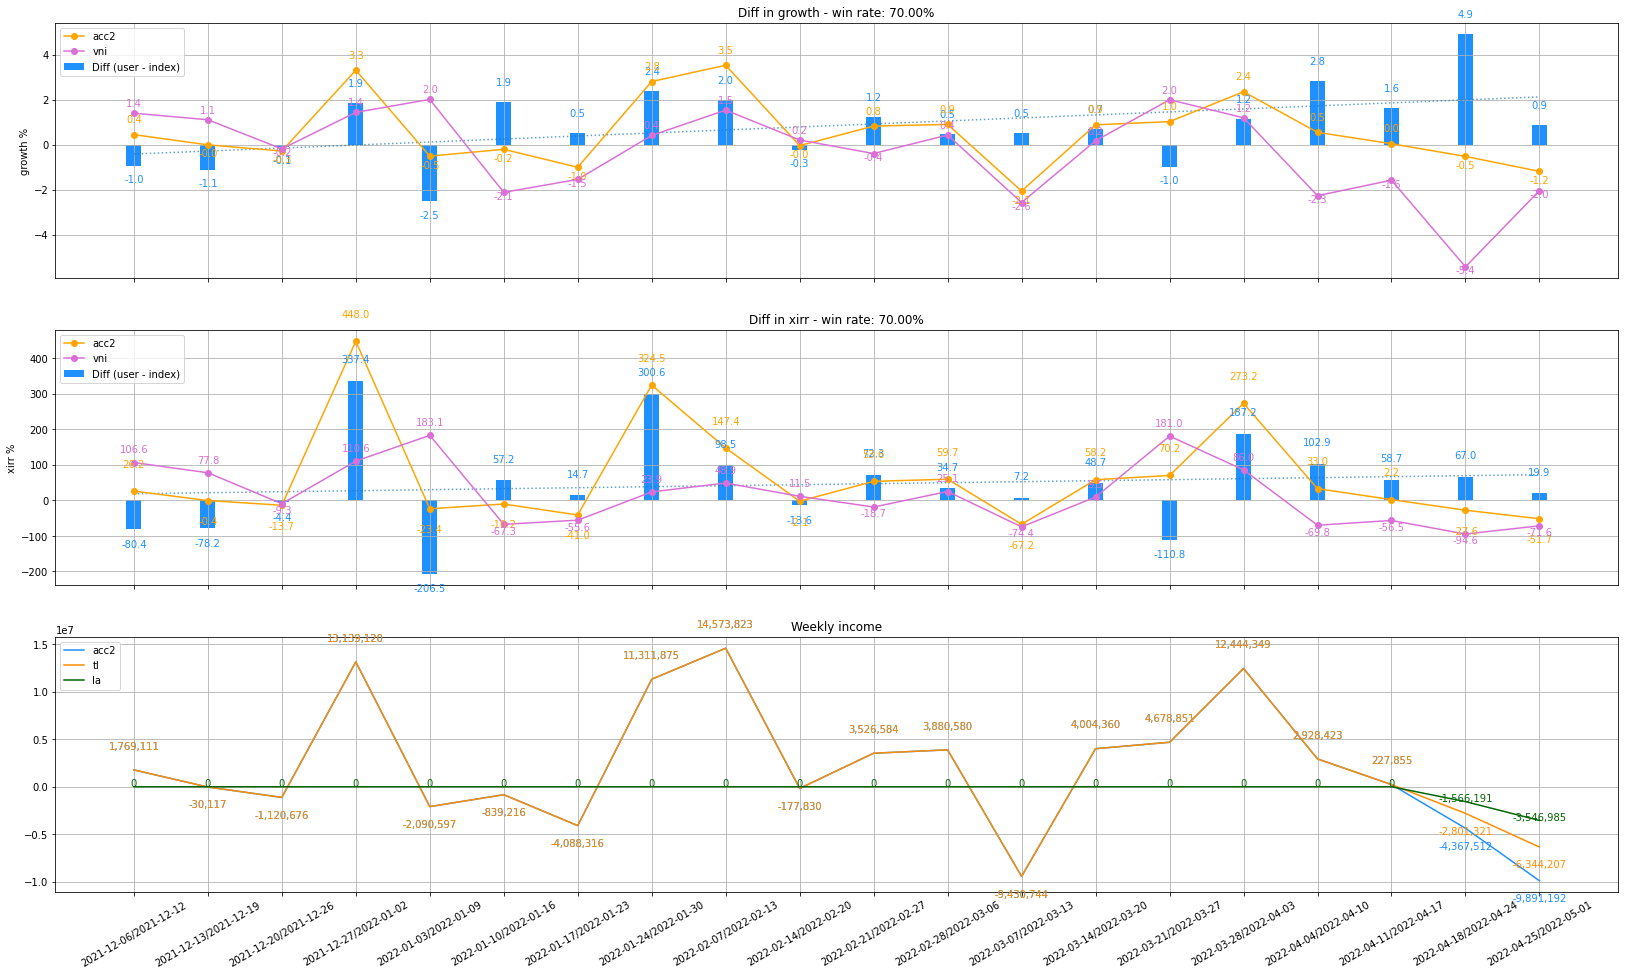

In [17]:
weekly_df = process_utils.get_period_df(
    period_symbol="W",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)
# Not enough space to plot every week
weekly_df = process_utils.filter_latest_x_rows(df=weekly_df, row_num=20)  # type: ignore

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=weekly_df,
    period_name="Weekly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Monthly


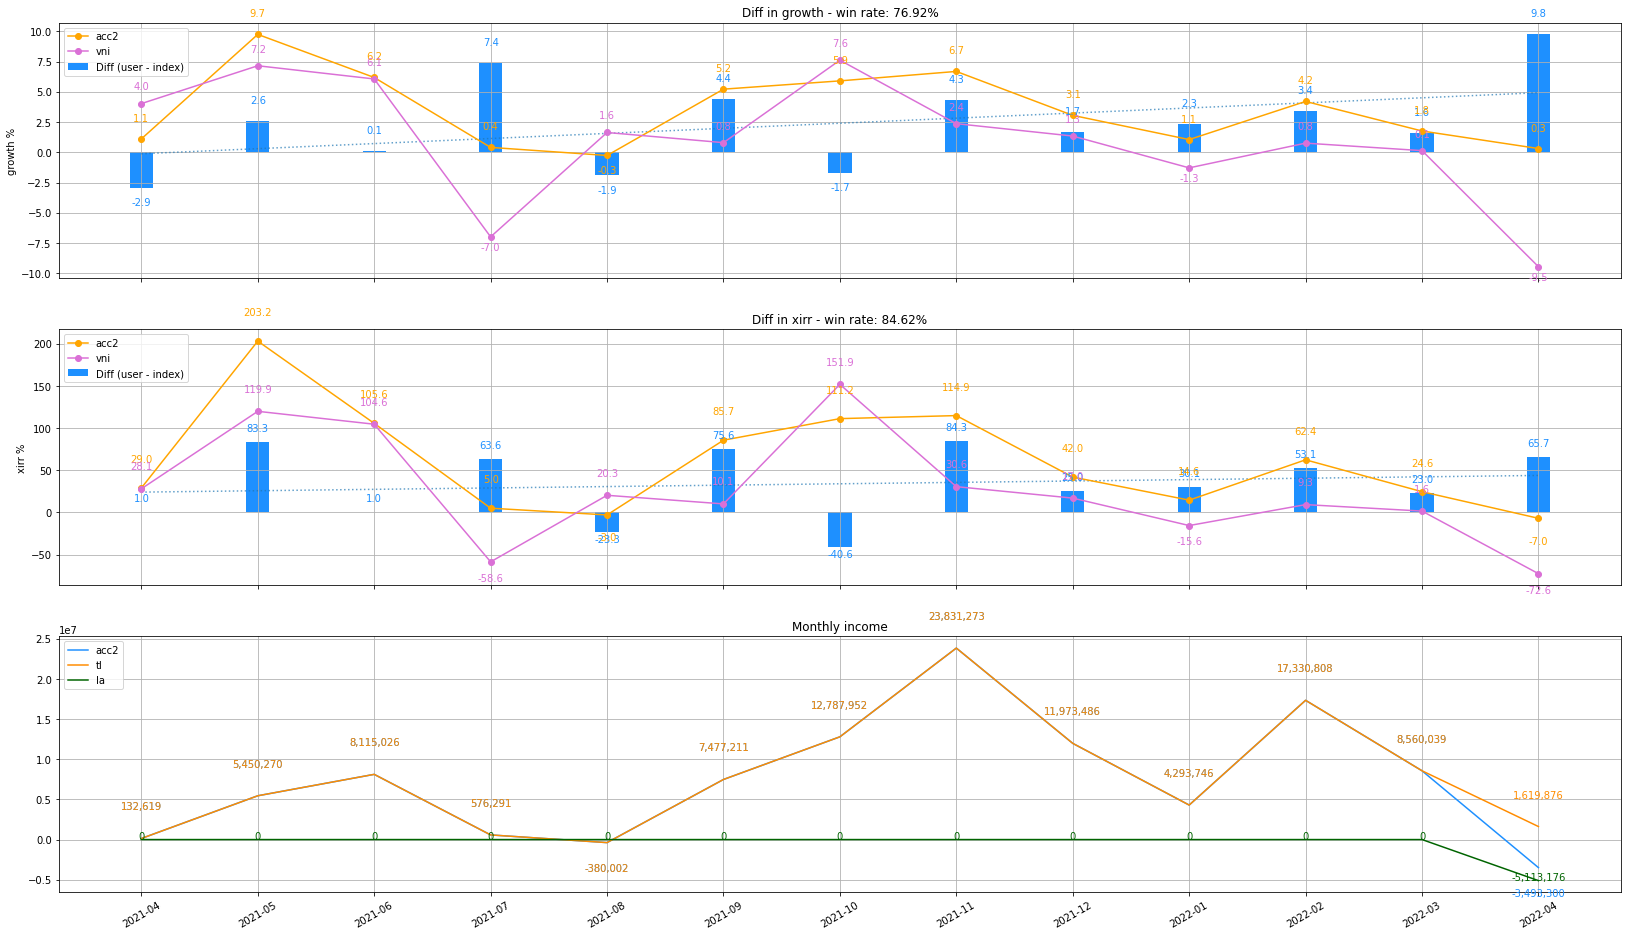

In [18]:
monthly_df = process_utils.get_period_df(
    period_symbol="M",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020-12
    monthly_df.drop(["2020-12"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=monthly_df,
    period_name="Monthly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Quarterly


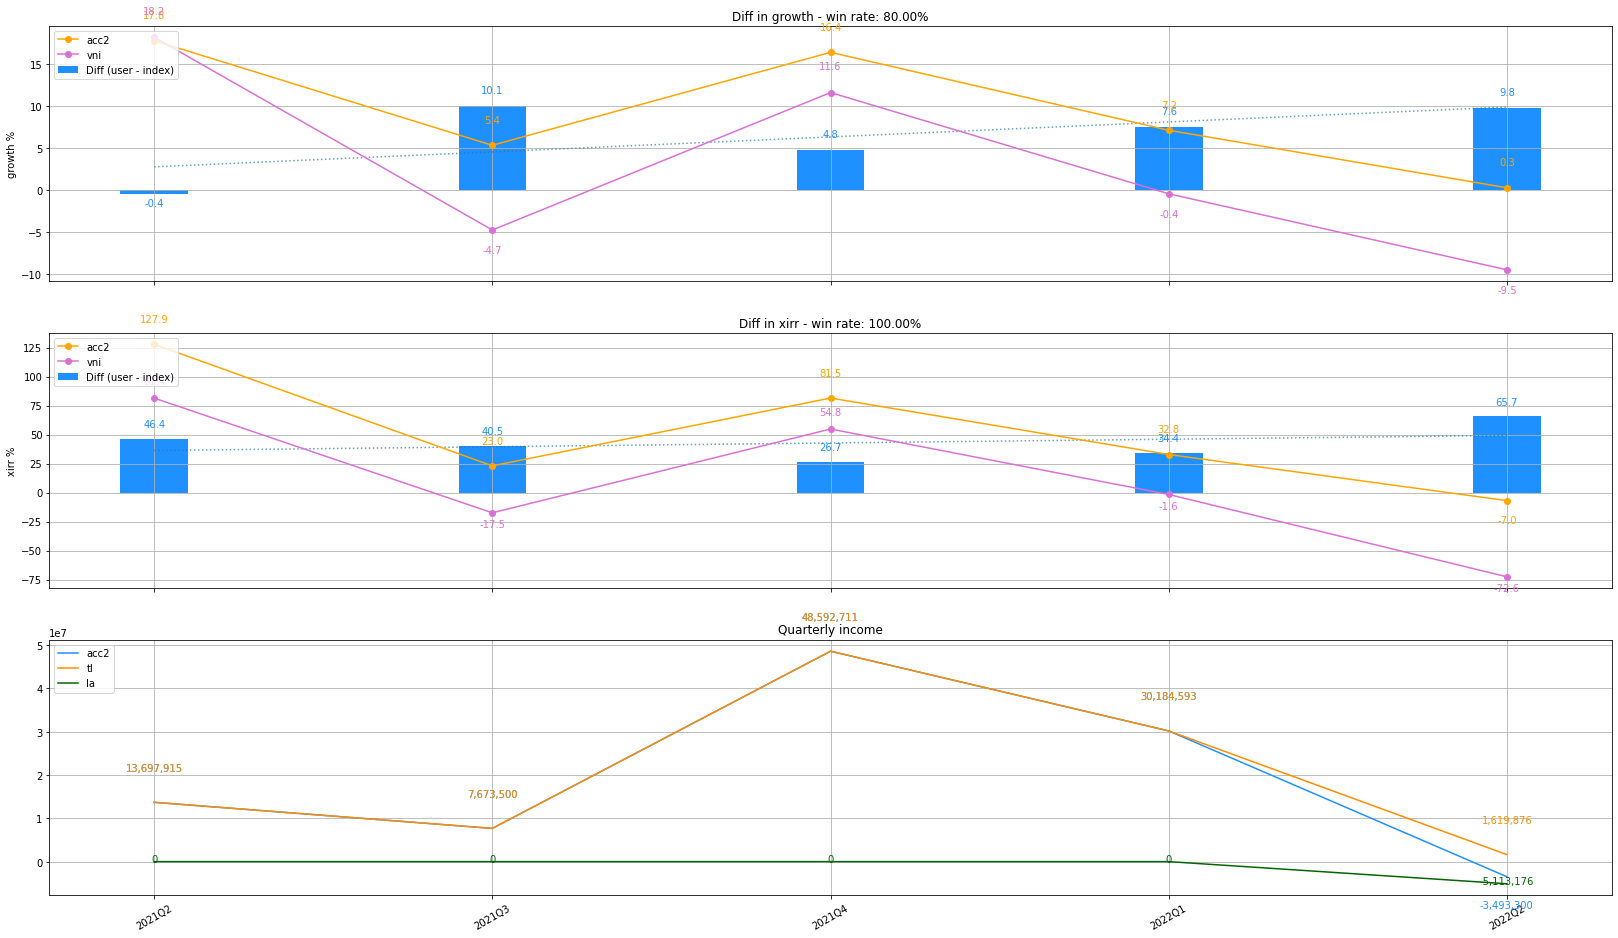

In [19]:
quaterly_df = process_utils.get_period_df(
    period_symbol="Q",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020Q4
    quaterly_df.drop(["2020Q4"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=quaterly_df,
    period_name="Quarterly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Yearly


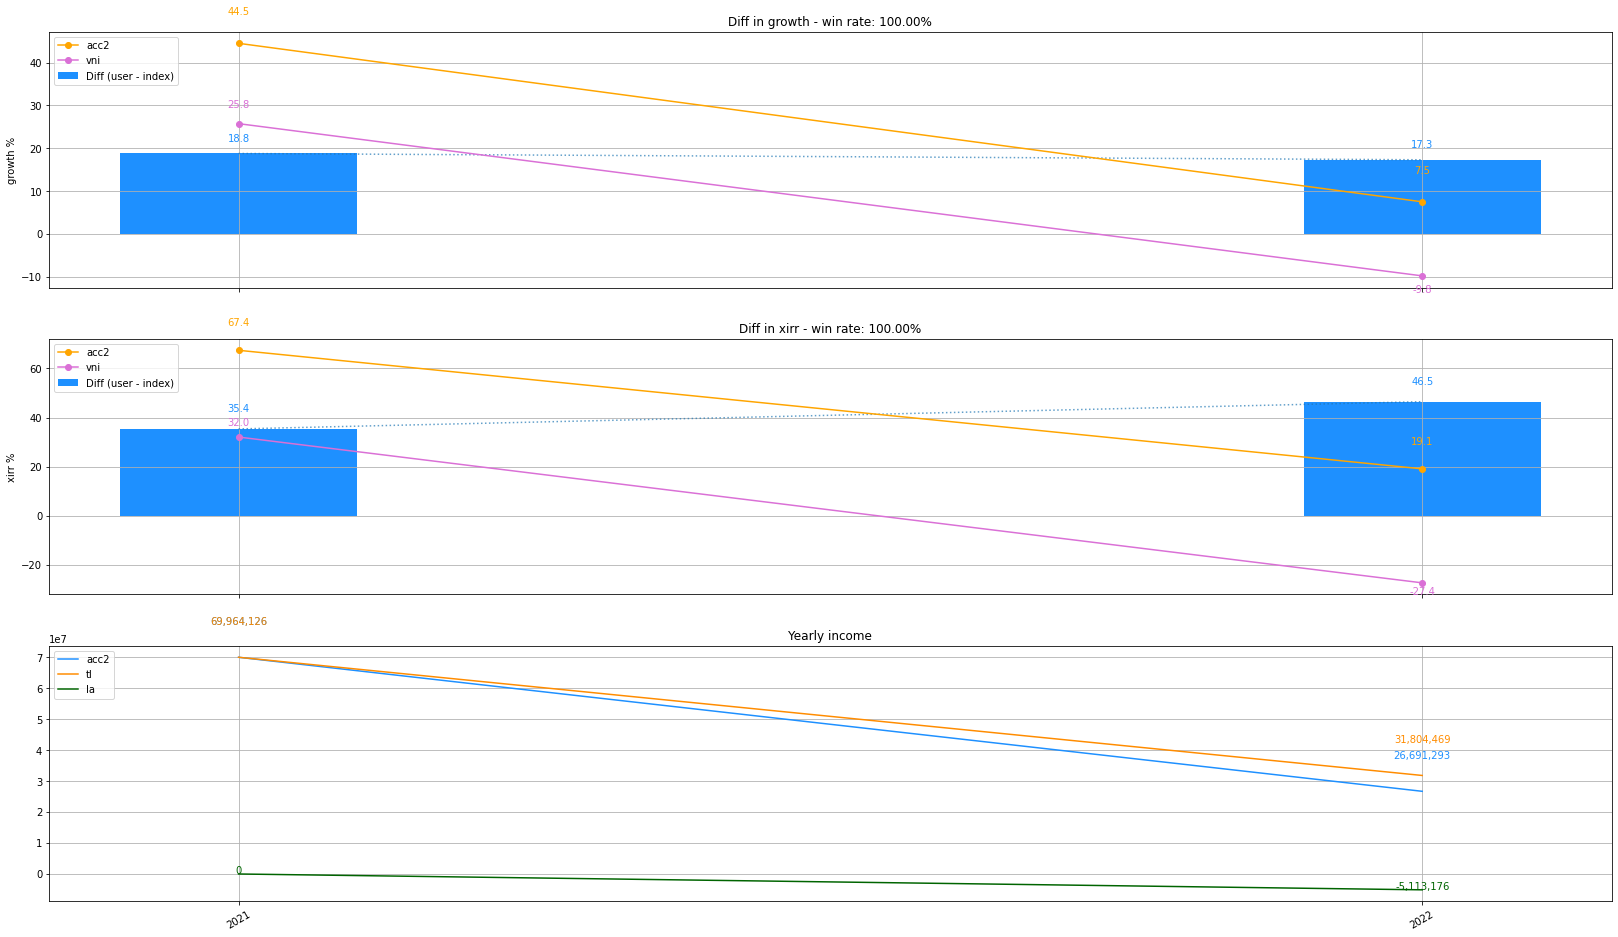

In [20]:
yearly_df = process_utils.get_period_df(
    period_symbol="Y",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020
    yearly_df.drop(["2020"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=yearly_df,
    period_name="Yearly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


## Fee


In [21]:
# processing_user_name = const.TN_USER_NAME
# user_fee_p = const.USER_NAME_FEE_DICT[processing_user_name]
# user_fee_anchor_date = const.USER_NAME_FEE_ANCHOR_DATE[processing_user_name]


In [22]:
# user_df.tail()


In [23]:
# relevant_columns = [
#     f"{compare_index}",
#     f"{compare_index}_diff_p",
#     processing_user_name,
#     f"{processing_user_name}_day_start",
#     f"{processing_user_name}_diff",
#     f"{processing_user_name}_diff_p",
# ]

# fee_df = user_df[relevant_columns]
# fee_df = fee_df[fee_df.index >= user_fee_anchor_date]  # type: ignore


# fee_df[f"{processing_user_name}_outperf_p"] = (
#     fee_df[f"{processing_user_name}_diff_p"] - fee_df[f"{compare_index}_diff_p"]
# )
# fee_df[f"{processing_user_name}_outperf"] = (
#     fee_df[f"{processing_user_name}_day_start"]
#     * fee_df[f"{processing_user_name}_outperf_p"]
# )
# fee_df[f"{processing_user_name}_outperf_fee"] = (
#     fee_df[f"{processing_user_name}_outperf"]
#     * user_fee_p
# )

# fee_df.tail()


In [24]:
# print(f"{processing_user_name}")


# cum_profit_df = fee_df[f"{processing_user_name}_diff"].sum()
# print(f"\t Cummulative daily profit: \t{cum_profit_df:,.0f}")

# cum_outperf = fee_df[f"{processing_user_name}_outperf"].sum()
# print(f"\t Cummulative outperf. profit: \t{cum_outperf:,.0f}")


# cum_fee = fee_df[f"{processing_user_name}_outperf_fee"].sum()
# print(f"\t Cummulative outferf. fee: \t{cum_fee:,.0f}")
